# Finding the best values for hyperparameters

We will first apply a systematic search using "grid search" to find the best values of two hyperparameters for MLP for the same classification problem previously studied. These hyperparameters are the number of neurons in the single hidden layer of the MLP and the value of the regularization constant (weight decay), $\alpha$

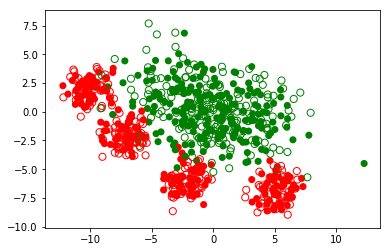

In [2]:
import numpy as np
import matplotlib.pyplot as plot

rotation = np.array([[0.94, -0.34], [0.34, 0.94]])
scale = np.array([[3.4, 0], [0, 2]])

np.random.seed(150)
class1d = (np.random.randn(400,2)).dot(sca).dot(rot)

class2d1 = np.random.randn(100,2)+[-10, 2]
class2d2 = np.random.randn(100,2)+[-7, -2]
class2d3 = np.random.randn(100,2)+[-2, -6]
class2d4 = np.random.randn(100,2)+[5, -7]

data = np.concatenate((class1d, class2d1, class2d2, class2d3, class2d4))

label_class1 = np.ones(400, dtype=int)
label_class2 = np.zeros(400, dtype=int)
labels = np.concatenate((l1c, l2c))

from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=0.5)

cmp = np.array(['r','g'])
plot.figure()
plot.scatter(data_train[:,0], data_train[:,1], c=cmp[label_train], s=50, edgecolors='none')
plot.scatter(data_test[:,0], data_test[:,1], c='none', s=50, edgecolors=cmp[label_test])

# emploi de PMC
from sklearn.neural_network import MLPClassifier

In order to use <a href="https://scikit-learn.org/stable/modules/grid_search.html">grid search</a>  and cross-validation to compare models obtained with all combinations of values for hyperparameters, it is necessary to use <a href="https://scikit-learn.org/stable/modules/grid_search.html">GridSearchCV</a>.

In [5]:
from sklearn.model_selection import GridSearchCV

It is necessary to indicate in a "dictionary" which hyperparameters one wishes to explore the values and what are the different values to be evaluated. Each entry in the dictionary consists of a string of characters that contains the name of the hyperparameter as defined in the estimator used. We will use MLPClassifier, the names of the parameters can thus be found in the definition of this class (see: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier">clic here</a>) . Here we consider only two parameters, $hidden\_layer\_sizes$ (number of neurons in the single hidden layer) and $alpha$ (the constant of regularization $\alpha$ for the weight decay).

In [6]:
tuned_parameters = {'hidden_layer_sizes':[(5,), (20,), (50,), (100,), (150,), (200,)],
                    'alpha':   [0.001, 0.01, 1, 2]}

In the call of $GridSearchCV$ we then indicate for $MLPClassify$ the solver to use systematically (which is not the default one), then the dictionary with the values of (hyper) parameters to explore and finally the cross-validation method, here  $k-fold$ with $k = 5$ which is used to compare different models.

In [7]:
mlpcl = GridSearchCV(MLPClassifier(solver='lbfgs'), tuned_parameters, cv=5)

# run the grid search
mlpcl.fit(data_train, label_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1, 2], 'hidden_layer_sizes': [(5,), (20,), (50,), (100,), (150,), (200,)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

$Scikit-learn$ then executes the following program:

1) From the lists of values for the different hyperparameters are generated all the combinations of possible values

2) For each combination, the performances of the corresponding models are evaluated by $5-fold$ cross validation (applied only on the data_train, label_train training data)

3) The values of the hyperparameters corresponding to the best cross-validation performances are selected

4) With these values for the hyperparameters a new training is realized with all the data of data_train, label_train.

The following lines are used to display the results: the parameters of the best model with mlpcl.best_params_, as well as the cross-validation results obtained for all combinations of values for the hyperparameters (mlpcl.cv_results_ gives access to this information and to many others).


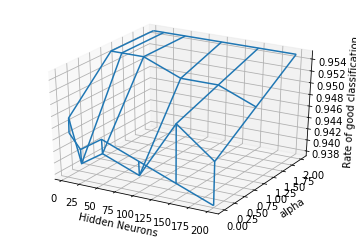

In [12]:
mlpcl.best_params_

n_hidden = np.array([5, 20, 50, 100, 150, 200])
alphas = np.array([0.001, 0.01, 1, 2])
xx, yy = np.meshgrid(n_hidden, alphas)
Z = mlpcl.cv_results_['mean_test_score'].reshape(xx.shape)

# wireframe display of the results of the evaluated models
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("Hidden Neurons")
ax.set_ylabel("alpha")
ax.set_zlabel("Rate of good classification")
ax.plot_wireframe(xx, yy, Z)

We used $plot\_wireframe$ here because for me readability is better than $plot_surface$.

### Question:

Try to use $plot\_surface$.

### Question:

How many MLPs are trained in total in this example?

### Question:

Examine the content of $clf.cv\_results\_$ more thoroughly.

### Question:

Evaluate the selected model on the test data (data_test, label_test).

### Question:

The aspect of the results encourages you to refine the grid? Edit the grid and review the new results.

Question:

Use random search with $RandomizedSerchCV$. The "budget" (total number of evaluated combinations) 
can be set with $n\_iter$. 

In [ ]:
#hint:
rclf = RandomizedSerchCV(MLPClassifier(solver='lbfgs'), param_distributions=param_distrib, n_iter=50, cv=5)
